To be put into order
1. Summary
2. Introduction
3. Technologies and Techniques
4. Results
5. Discussion
    - How much energy is currently curtailed annually across the Orkney Isles?
    - How much can this be reduced by different levels of DR penetration?
    - How many local households would need to be on our DR scheme in order to supply this level of DR?
6. References
7. Appendix

# 1. Summary
Wind turbines in the industrial field usually limit the output power at a power set-point, which is always below the optimal operating condition. 

# 2. Introduction

# Objective
Effective use of curtailed power and find business opportunity, analyzing viability of business proposition to go / no go.

If we can control demand, we may be able to use it to balance the system instead of curtailing
generators. This could provide a number of benefits: 
- it would reduce wastage of renewable energy and thus increase the fraction of energy generated by renewables within the UK;
- it could provide access to cheaper energy for local consumers on Orkney, reducing fuel poverty and linking locals to the benefits of wind turbine development on the isles;
- it would increase the revenue of generators close to the top of the curtailment order and therefore improve the business case for building new (marginal) generators;
- it could help to avoid more costly network capacity upgrades, which would be an alternative solution to the curtailment problem


# Hypotheses
1. There is sizable wasted power due to curtailment.
2. There will be physically sufficient room for power storage which absorbs redundant power which otherwise curtailed. 
3. Value of such curtailed power is large enough to be shared among households and the company, and additional investment for batteries, hot water storage can be paid back in 3 years.(for example)
4. High wind speed + Low demand results in higher curtailment. For instance, more windy days during autumn and winter, and during nights and midnights. However, not much demand in midnights which could possibly cause higher curtailments in all seasons.
5. Low wind speed + High demand results in lower curtailment. For instance, demands during nights could be higher, but in summer time wind speed is generally lower, which could result in lower curtailments.
6. Due to the geographical location, Orkney never lack of wind and sometimes could be very windy with gusts even in summer. Therefore, we may not be able to see a clear seasonal trend of curtailment.

# brief overview of the approach used in your analysis
......




# 3. Technologies and techniques

........


## 3.1 Assumptions:
1. Wind velocity pattern and demand stay the same level as those of data explored. 
2. Electricity price :   XX pounds/kWh

Q: What to do with power > set point?

Q: What should we do with Null Power_kw, Setpoint_kw, Wind_ms? Remove from dataset?
Setpoint should never includes NA because they're system control????.....
Wind should never includes NA because that's not natural, but 0.xx could be possible but just can't read by the computer system
power kW never includes NA because of the reason above (wind never 0), and 1 minute interval is just too much that's why some 0 recorded
Therefore, we removed the records from dataset

Q: What should we do with 0 Power_kw, Setpoint_kw, Wind_ms? Remove from dataset?
check the figures and get back to Horri
should include these in our figures because households demand are quite low sometimes
Power -ve: change them to 0 and keep all 0
Setpoint 0: remove
wind 0: remove


###### Supply excel
Missing data

2015 data are not completed, but not faulty. We'll drop 2015 data in plotting some graphs.
Some 2017-04 data missing, but it's alright as we have 2016's
Q: Should we remove Power_kW above setpoint?

Yes, omit them in data analysis part. These are special cases .... due to inertia ... 0 setpoint set but the turbine can't stop immediately. Safe to omit. Can't include these in curtailment calculation ......
Remove everything Power_kw>setpoint. But still include power kw <= setpoint

## 3.2 Curtailed power (kW) and Curtailed energy (kWh)

## 3.2.1 Choosing blade length for potential power calculation
Potential power (kW) = 0.5 * air density 1.23 * (pi * blade length^2) * (wind speed^3) * Power coefficient 0.4 / 1000
We use power coefficient 0.4 because ......

We tried to find the blade length where the potential power generated is the closest to the actual power ...... power points bounced evenly around the 26 curve....

Vertical line wind speed 12m/s is plotted to show us .....

Length = 26m is the best fitted

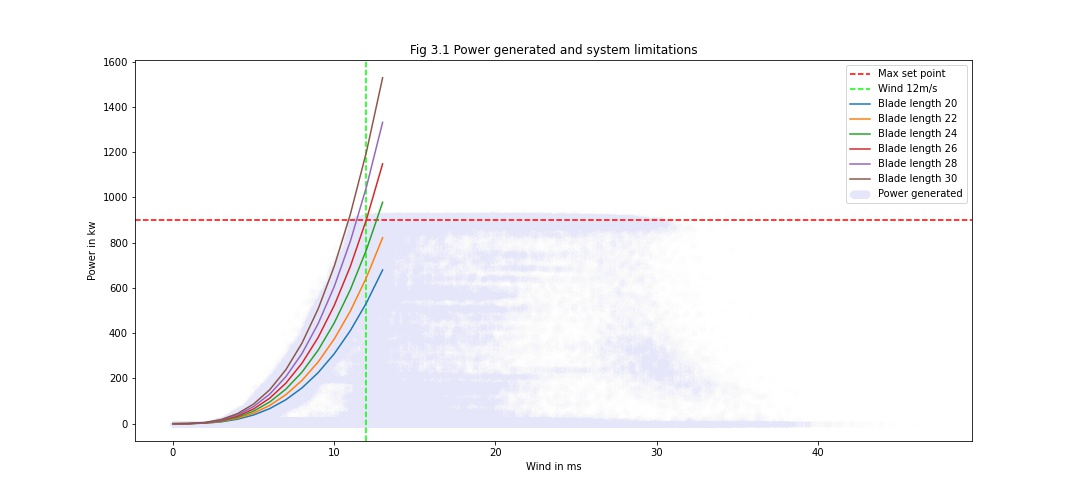

## 3.2.2 Curtailed power (kW)

#### What is curtailed power?
How $strong$ the current is ......

#### Curtailed power equation
curtailed power (kW) = potential power - total power consumed 

where,
- potential power: before 12m/s = theoratical potential power ; after 12m/s = 900kW (Max set point due to mechanical limitation. Theoratically can reach a higher power but practically constrainted by current mechanical design.)
- total power consumed = total power generated (Power_kw)

## 3.2.3 Curtailed energy (kWh)

#### What is curtailed energy?
How $much$ energy actually curtailed....
We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power * 60 sec x 0.278 x 10^-3 

## 3.2.4 Curtailment computation
Data used:
- df_supply: Drop NA and 0 records except 0 Power_kW
- df_demand: Drop 2018 and household number outliers
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation.

Columns:
- Timestamp
- Power_kw:	average power in kW during the measurement period
- Setpoint_kw:	the mean maximum-allowed generator output during the measurement period
- Wind_ms:	mean wind speed at the turbine during the measurement period.
- Potential_power_kw:	potential energy of single turbine = 0.5 * 1.23 * (pi * 26^2) * wind speed ^3 * 0.4 / 1000
- Curtailed_power_kw: potential power - total power consumed 
- Curtailed_energy_in_1_minute_kwh:	Aggregated power in 1 minute. curtailed power * 60 sec x 0.278 x 10^-3 

## 3.3 OLS regression

Model explainations


# 4. Results

### 4.1.1 Low demands
In general, most households need 0.2-0.3kW and around 0.1 kW per minute throughout the year. Two dinstinct level of demands could possibly due to demands during different hours in a day. During midnights, 0.1kW demand becuase they're sleeping. While during dinner time that everyone back to home after work or school, 0.2-0.3kW needed for meals preparation, heaters, lights and hot water etc. 

From below figure (Fig 4.1), it shows that demand in Jan (coldest days in winter) is highest, and dropped constantly until Jul and Aug (hottest days in summer), then rose again and reached highest in Jan. Higher electricity needs could be related to  heater operations during cold hours.


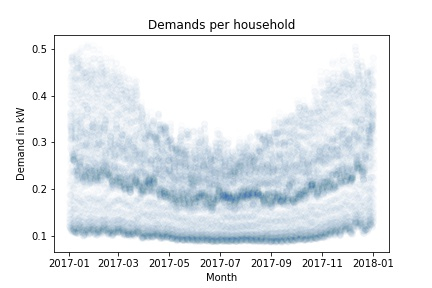

Monthly demand per household (Fig 4.2) is the highest in Winter (395kW) and lowest in Summer (270kW, 32% less). This again, is reasonable due to more electricity for heaters and lightings required during winter.
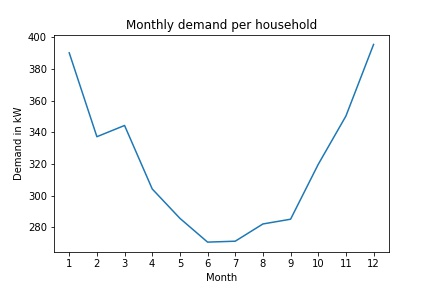

#### 4.1.1.1 Average demand in Scotland
According to Table 2 in https://great-home.co.uk/average-electricity-gas-bills-in-2019/, average Energy Monthly Consumption in Scotland was 308kWh as shown in this table:
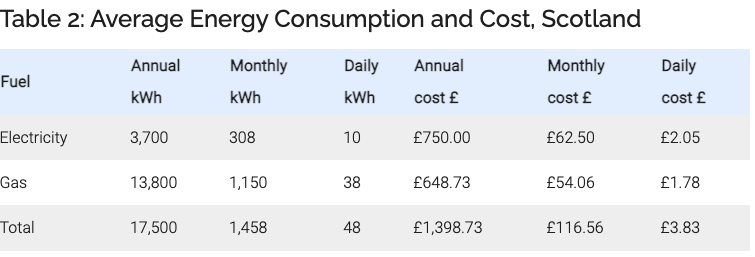

which is 2-3 times more than our Orkney wind turbine average demands:

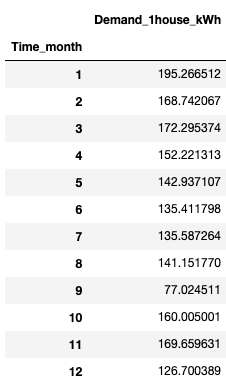

The reasons why households use not much wind energy, could possibly due to more gas usage instead of electricity, or inconvenience in turning wind turbine on and off. Therefore, we could at least increase average household demand 3 times by implementing discounts to attract them use more wind rather than gas, and more convenient wind turbine controls and smart meters.

We want not just the average demand meeting the average Scotland level, but more of that by yearly plans.

### 4.1.2 Wind energy supply much more than demand
According to the government https://www.nrscotland.gov.uk/files/statistics/council-area-data-sheets/orkney-islands-council-profile.html#table_pop_est, Orkney Island total household number was 22,000 at the beginning of 2017, and increased to 22,190 by 2018. The growth rate is 0.86%. Also, the historical yearly growth rate was more or less 1%.

The number of households using wind turbines increased steadily during 2017 (Fig 4.3). From approximately 5000 in the beginning of the year to 10000 by the end of the year. The growth rate is 100%.

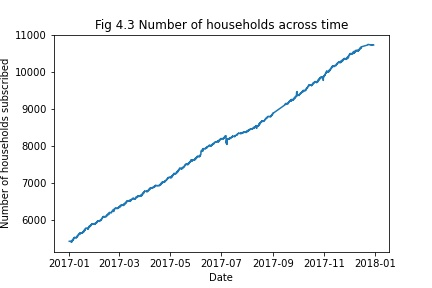

With the fast growth rate of wind turbines users plus slow growth rate in total households in Orkney, in just 2-3 years we'll have almost 100% of residents using wind turbines. However, assuming all households using wind turbines, we still expecting a huge curtailment with current low demand which we're going to show you in 4.1.5. Therefore, our goal is to maximise every single household demand, assuming 100% households (22190) use wind turbine.


According to Metoffice statistics https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/wind/windiest-place-in-uk, Orkney island is one of the top windiest parts in the UK.

Below fig 4.4 shows wind speed ranges most from 8-20m/s (53.6% of the recorded data), and some gusts 20-30m/s in all seasons(6% of the recorded data), especially in Winter. With low demand and high wind speed, for sure there'll always be high curtailments.

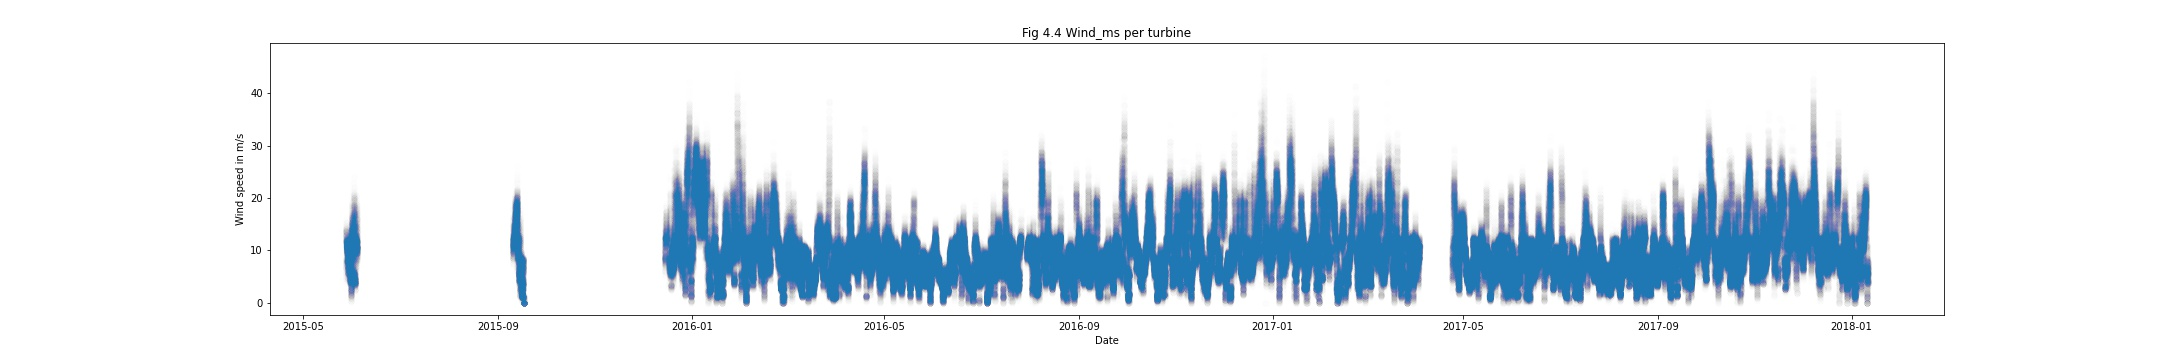

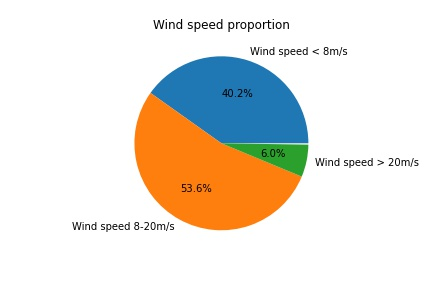

### 4.1.3 Power usage and generation pattern 

#### 4.1.3.1 Average Wind speed pattern:

1. Winter (Nov - Feb): highest
2. Summer (May - Aug): lowest
3. Spring and Autumn: moderate
4. Not much differences in terms of hours

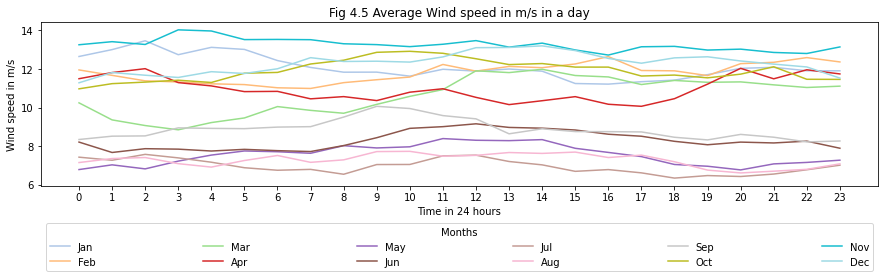

#### 4.1.3.2 Average Demand pattern:

1. 0am-5am: low, sleeping
2. 5am-7am: start rising coz time to wakeup
3. 7am-3pm: constant coz people in office/ school, maybe just one person at home watching TV or doing houseworks.
4. 3pm-5pm: rise, peak at 5pm. People off work/ school, back to home and start using electricity like TV, computer, lights.... Winter time has higher peak beacuase the period is colder which we use more heaters, and dark earlier thus use light earlier, therefore draw a higher demand during 5pm-11pm
5. 6pm-11pm dropping: Night life outside, time to sleep

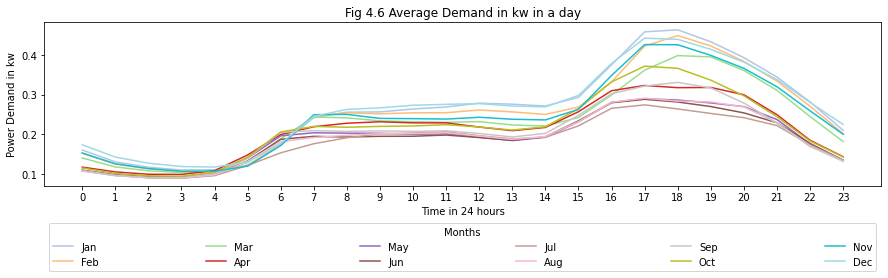

#### 4.1.3.3 Average Curatiled energy:

As shown in Fig 4.7, we don't see any obvious pattern across the year, which is as expected because curtailed energy is calculated from potential power and power generated which is affected by both demand and wind speed, and also other factors suc as power loss which was not recorded. 

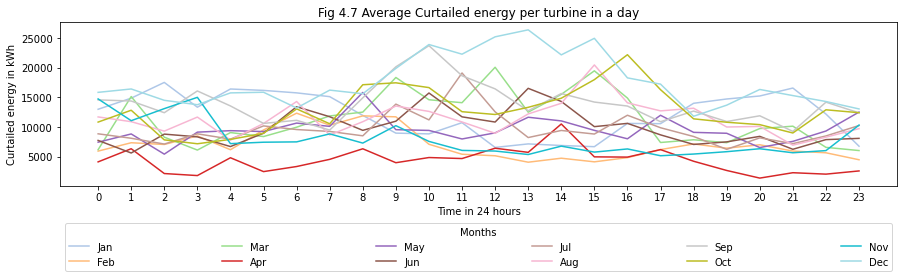

Potential power is positively correlated with wind speed. Power generated is positively correlated with both demand and wind speed. With constant demand, an increase in wind speed will cause curtailment increase and vice versa. 

If we just look at one month (fig below), for example, in Jan, we can see a clear relationship between curtailed energy, demand and wind speed. In the midnight 3:00-4:00, wind speed increased while demand looked constant, results in an increase in 3000 kWh curtailment. Some other combined effects not as expected could due to other factors such as energy loss or generated for export use.

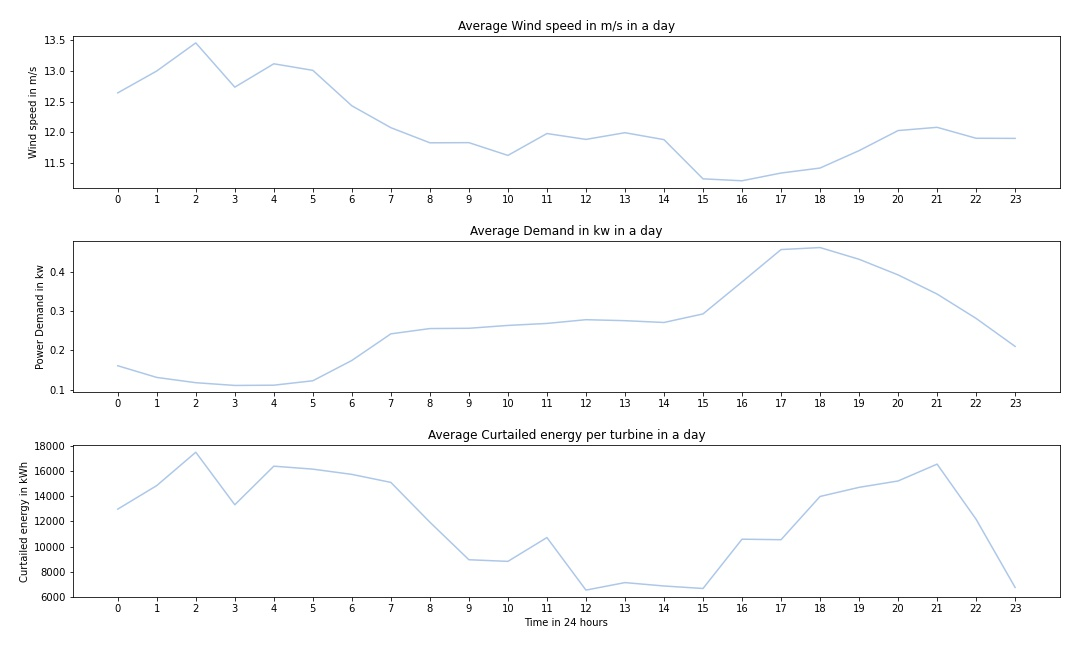

### 4.1.4 OLS model

As just mentioned in 4.1.3.3, we don't see an obvious average Curatiled energy pattern across the year or in different months because curtailed energy is indirectly affected by demand, wind speed and some other factors not recorded. 

Power generated used for curtailment calculation as mentioned in 3.2 can be estimated using OLS regression with very high R-sqaured 0.893 using independent variables mean power demand (kW), wind speed (m/s) and potential power (kW). 
As we estimated, 0.1 m/s increase in wind speed causes 0.77885kW decrease in power generated, while 0.1 kW increase in demand results in 5.49 kW increase in power generation. Therefore, a slight change in demand can cause a very significant change in power generation thus curtailment.

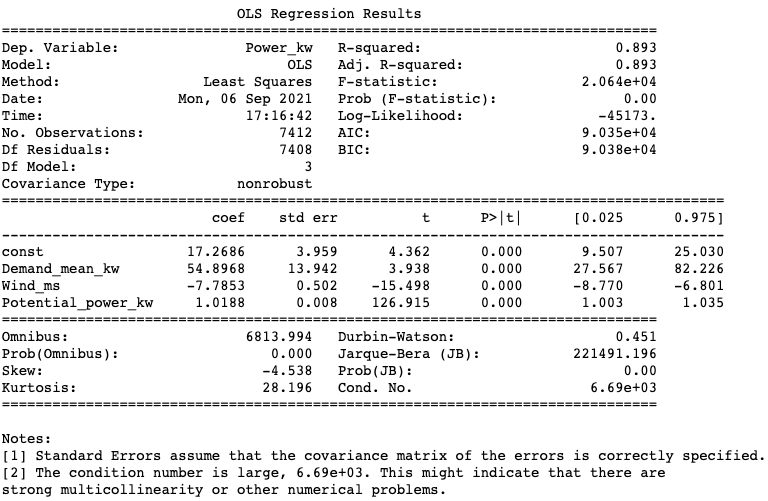

### 4.1.5 Huge curtailed energy
The total monthly curtailed energy of 500 turbines is very massive that can support extra 869663 households yearly base on current demand (Fig 4.8), some months demand exceeds supply but some months in opposite, households could save wind energy in battery during Dec and other curtailed months, and use the storage during the time demands more than supply. However, as mentioned in 4.1.2, the Island household growth rate is very slow that will need many years to reach an extra 869663 household .
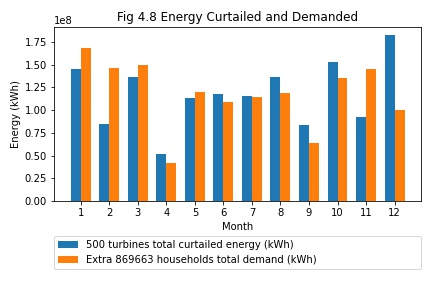

# 5. Discussion

With all the findings in above 4.Results, we could at least boost our revenue 2-3 times just to match the average Scotland electricity usage. Beyond that, with kind of 'umlimited' wind power due to the huge excess curtailment, we could give more discounts and affordable yearly plans to attraction more new customers and encourage them to use more energy.
- Promoting wind energy usage
- Acquiring new customers
- Increasing demands
- Introducing new plans
    - Like mobile plans: 8GB £10, 15GB £15, 45GB £20. With just a small differences in price but huge difference in data, consumers will go for bigger plans.


## 5.1 Energy curtailment and possible usage
### 5.1.1 How much energy is currently curtailed annually across the Orkney Isles?



### 5.1.2 How much can this be reduced by different levels of DR penetration?




### 5.1.3 How many local households would need to be on our DR scheme in order to supply this level of DR?






# 6. References

# 7. Appendix

## 7.1 Data import

### 7.1.1 Importing residential_demand.csv 
The dataset residential_demand.csv is successfully imported and named df_demand. No null or 0 records is found. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [85]:
df_demand = pd.read_csv('residential_demand.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_demand.head(3)

Timestamp  Demand_mean_kw  N_households
0 2017-01-01 00:00:00        0.220106          5428
1 2017-01-01 00:30:00        0.205945          5429
2 2017-01-01 01:00:00        0.189090          5429

In [9]:
# To check any null data
df_demand.isnull().describe()

Timestamp Demand_mean_kw N_households
count      17568          17568        17568
unique         1              1            1
top        False          False        False
freq       17568          17568        17568

In [10]:
# To check any 0 data
df_demand.describe()

Demand_mean_kw  N_households
count    17568.000000  17568.000000
mean         0.219090   8630.642133
std          0.090129   2999.141750
min          0.086607   5406.000000
25%          0.143592   6781.000000
50%          0.212315   8190.500000
75%          0.273678   9652.000000
max          0.509662  30037.000000

### 7.1.2 Importing turbine_telemetry.csv
The wind turbine power generation dataset turbine_telemetry.csv is imported and named df_supply. Null and 0 vaules are found in Power_kw, Setpoint_kw and Wind_ms. Setpoint as system control should never be null or 0 or will cause system failure otherwise. Wind will at least be recorded 0m/s when the wind speed is too low that system can't detect, but the geographical location making Orkney Island almost impossible to get 0m/s wind speed, thus both null and 0 wind speed should be dropped. Power can't be null when wind speed is always positive, but can possibly be 0 becuase customers could have no demand during midnight, although its nearly impossible to happen we still include this possibility in our analysis. 

In [11]:
df_supply = pd.read_csv('turbine_telemetry.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_supply.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms
0 2015-05-28 00:00:23      80.0        900.0      4.9
1 2015-05-28 00:01:23      78.0        900.0      5.4
2 2015-05-28 00:02:23      52.0        900.0      4.9

In [12]:
# To check any null data
# 2 unique values mean True and False exists in checking null, thus null exists.
df_supply.isnull().describe()

Timestamp Power_kw Setpoint_kw  Wind_ms
count    1069636  1069636     1069636  1069636
unique         1        2           2        2
top        False    False       False    False
freq     1069636  1066934     1066921  1066931

In [86]:
# To check any 0 data shown
# Min get a zero value means 0 data exists.
df_supply.describe()

Power_kw   Setpoint_kw       Wind_ms
count  1.066934e+06  1.066921e+06  1.066931e+06
mean   3.671871e+02  8.106578e+02  9.955093e+00
std    3.399636e+02  2.615071e+02  5.453944e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    5.100000e+01  9.000000e+02  6.100000e+00
50%    2.510000e+02  9.000000e+02  9.000000e+00
75%    7.040000e+02  9.000000e+02  1.240000e+01
max    9.380000e+02  9.000000e+02  4.720000e+01

## 7.2 Visualising raw data see any obvious trends or missing data

### 7.2.1 Households demands (df_demand)

In general, most households need 0.2-0.3kW and around 0.1 kW per minute throughout the year. Two dinstinct level of demands could possibly due to demands during different hours in a day. During midnights, 0.1kW demand becuase they're sleeping. While during dinner time that everyone back to home after work or school, 0.2-0.3kW needed for meals preparation, heaters, lights and hot water etc. 

From below figure, it shows that demand in Jan (coldest days in winter) is highest, and dropped constantly until Jul and Aug (hottest days in summer), then rose again and reached highest in Jan. Higher electricity needs could be related to  heater operations during cold hours.

Monthly demand per household is the highest in Winter (395kW) and lowest in Summer (270kW, 32% less). This again, is reasonable due to more electricity for heaters and lightings required during winter.

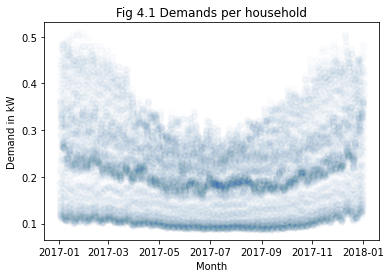

In [14]:
plt.scatter(df_demand['Timestamp'] , df_demand['Demand_mean_kw'], alpha=0.01)
plt.title('Fig 4.1 Demands per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.savefig('./img/Fig 4.1 Demands per household scatter.jpg')
plt.show()

In [93]:
print('Average demand during 0am-5am: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(0,6))].mean()[0])
print('Average demand during 6am-7am: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(6,8))].mean()[0])
print('Average demand during 8am-3pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(8,16))].mean()[0])
print('Average demand during 4pm-5pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(16,18))].mean()[0])
print('Average demand during 6pm-11pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(18,24))].mean()[0])

Average demand during 0am-5am:  0.11394701122042078
Average demand during 6am-7am:  0.2019947488365781
Average demand during 8am-3pm:  0.2290442316733965
Average demand during 4pm-5pm:  0.33522166066129044
Average demand during 6pm-11pm:  0.2779502116029702


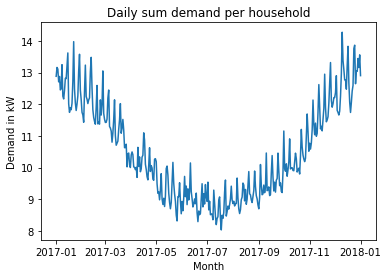

In [95]:
# daily demand sum
df_demand.groupby(df_demand.Timestamp.dt.date).sum()['Demand_mean_kw'].plot()
plt.title('Daily sum demand per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.show()

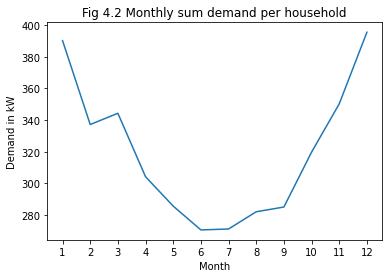

In [94]:
# monthly demand sum
df_demand.groupby(df_demand[df_demand.Timestamp.dt.year == 2017].Timestamp.dt.month).sum()['Demand_mean_kw'].plot()
plt.xticks(range(1,13))
plt.title('Fig 4.2 Monthly sum demand per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.savefig('./img/Fig 4.2 Monthly demands per household scatter.jpg')
plt.show()

According to the government https://www.nrscotland.gov.uk/files/statistics/council-area-data-sheets/orkney-islands-council-profile.html#table_pop_est, Orkney Island total household number was 22,000 at the beginning of 2017, and increased to 22,190 by 2018. The growth rate is 0.86%.

The number of households using wind turbines increased steadily during 2017. From approximately 5000 in the beginning of the year to 10000 by the end of the year. The growth rate is 100%.

With the fast growth rate of wind turbines users plus slow growth rate in total households in Orkney, in just 2-3 years we'll have almost 100% of residents using wind turbines. However, assuming all households using wind turbines, we still expecting a overall loss in revenue due to curtailment which we're going to show you our analysis later. Therefore, our goal is to maximise every single household demand, assuming 100% households (22190) use wind turbine.

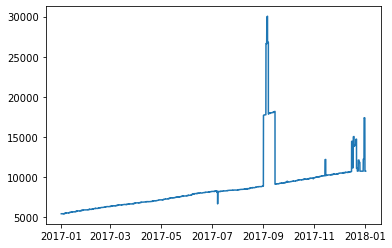

In [17]:
plt.plot(df_demand['Timestamp'] , df_demand['N_households'])

<AxesSubplot:ylabel='N_households'>

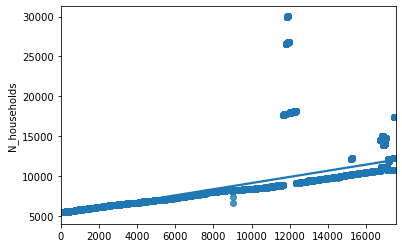

In [18]:
sns.regplot(df_demand.index , df_demand['N_households'])

#### These 4 spikes / outliers data will be removed.
1. Number of households <8000 in 2017-07
2. Number of households >15000 in 2017-09
3. Number of households >10500 in 2017-11
4. Number of households >11000 in 2017-12

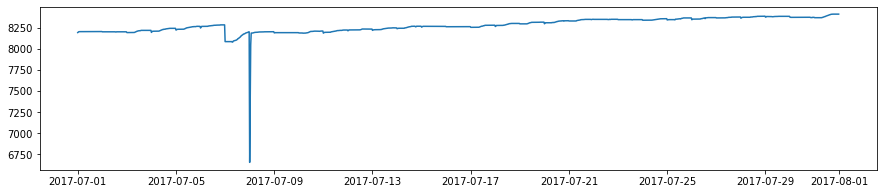

In [19]:
n=7
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

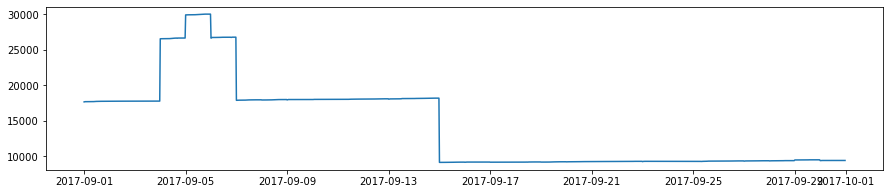

In [20]:
n=9
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

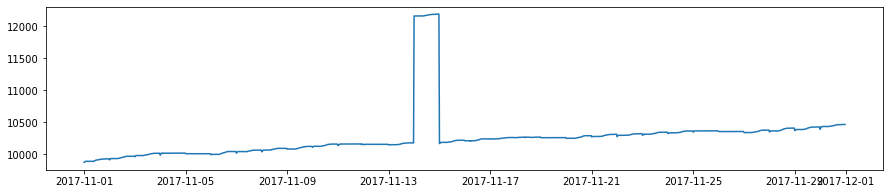

In [21]:
n=11
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

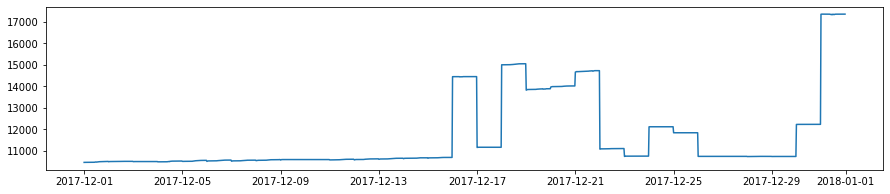

In [22]:
n=12
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

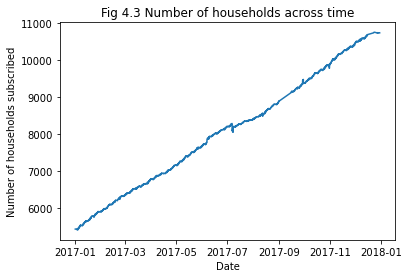

In [23]:
# Averge demands per households
tmp=df_demand[df_demand.Timestamp.dt.year == 2017] # 2018 only have one month data. Drop 2018 for easier calculation.

# Drop outliers
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 7][tmp['N_households'] < 8000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 9][tmp['N_households'] > 15000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 11][tmp['N_households'] > 10500].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 12][tmp['N_households'] > 11000].index)

plt.plot(tmp['Timestamp'] , tmp['N_households'])
plt.xlabel('Date')
plt.ylabel('Number of households subscribed')
plt.title('Fig 4.3 Number of households across time')
plt.savefig('./img/Fig 4.3 Number of households across time.jpg')
plt.show()

## 7.2.2 Wind turbines generation (df_supply)

Below we plotted the relationships between variables. The main findings would be some extra power generated beyound setpoint. Sometimes the setpoint is set to a lower point and the turbine should react accordingly, but the turbine can't stop immediately due to inertia. We'll remove records where Power_kw > Setpoint in analysis.

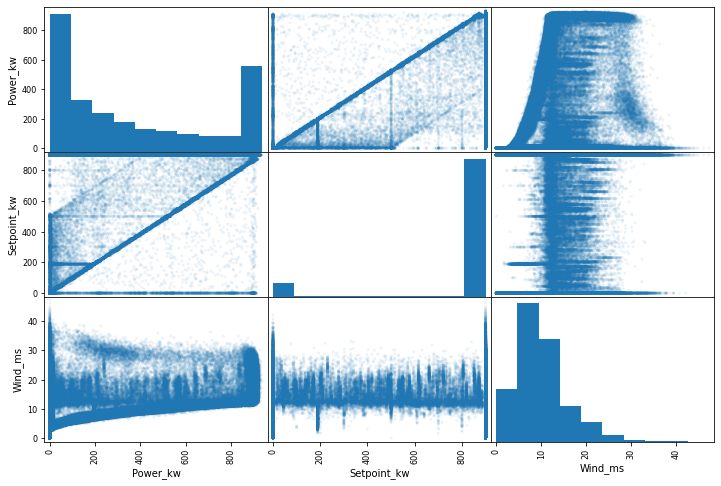

In [24]:
from pandas.plotting import scatter_matrix

#----------------------------------
#draw a scatterplot to look at the relationship of each variables
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

Below scatterplot shows the power generation pattern. From the plot, we found missing data in 2015 and Apr 2017. In 2015, too few data for analysis so we'll simply drop all 2015 data in plotting some graphs later. Almost whole Apr 2017 data is missing, but since we have Apr 2016 data and the seaonsal pattern doesn't varies much, the missing data won't pose huge problem on our analysis. Same case for missing data in Oct 2016 .

Despite the missing data, it is observed that wind turbine generated 0-400 kW during summer (May - Sep) and 900 kW during winter (Nov-Feb). This matches with the demand pattern which has higher demand in winter and lower in summer.

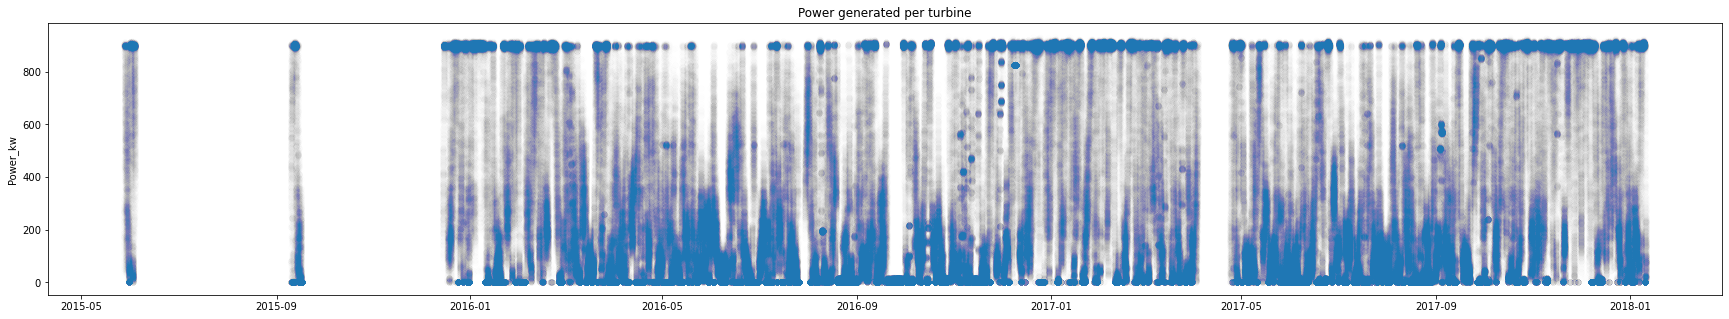

In [25]:
#----------------------------------
#draw a scatterplot to look at the power generation pattern

plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Power_kw'], alpha = 0.005)
plt.ylabel('Power_kw')
plt.title('Power generated per turbine')

plt.show()

Set point per turbine scatterplot below shows us that most of the time setpoint is 900kW. 

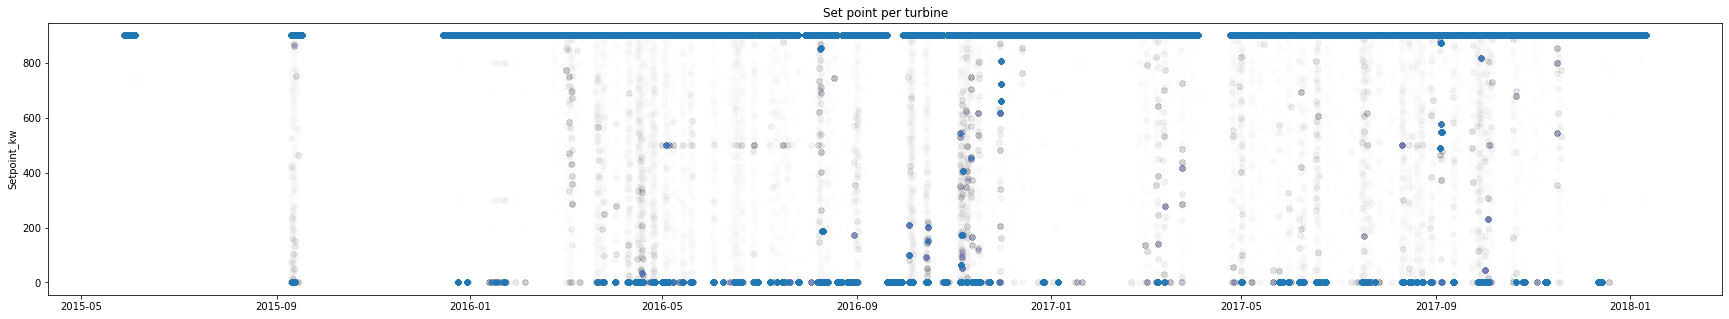

In [26]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Setpoint_kw'], alpha = 0.005)
plt.ylabel('Setpoint_kw')
plt.title('Set point per turbine')

plt.show()

According to Metoffice statistics https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/wind/windiest-place-in-uk, Orkney island is one of the top windiest parts in the UK.

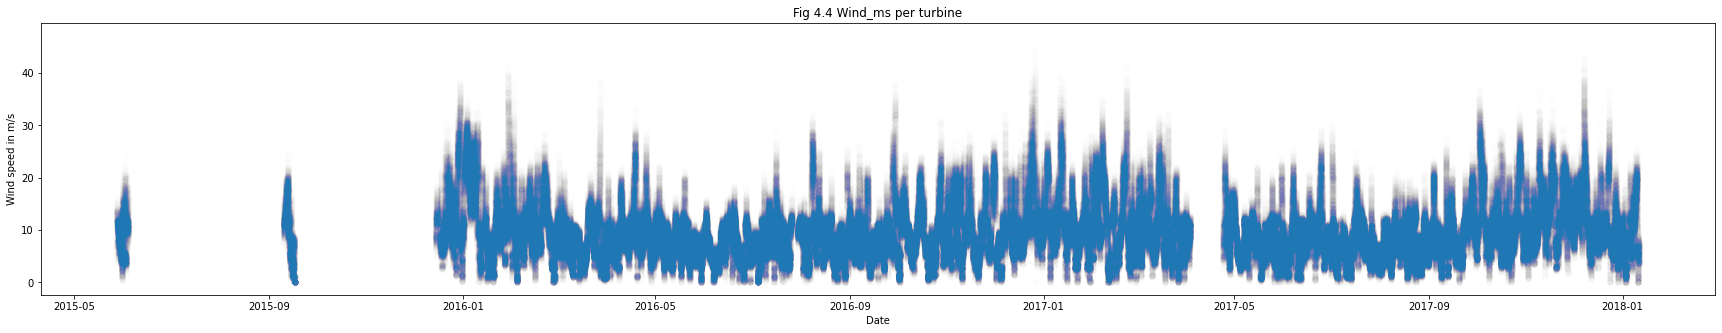

In [96]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.003)
plt.xlabel('Date')
plt.ylabel('Wind speed in m/s')
plt.title('Fig 4.4 Wind_ms per turbine')

plt.savefig('./img/Fig 4.4 Wind_ms per turbine.jpg')
plt.show()

In [132]:
# 60% of record show wind speed >= 8m/s
tmp = pd.DataFrame(data=d,columns=['%'])
tmp.loc['Wind speed < 8m/s'] = len(df_supply[df_supply['Wind_ms'] < 8])/len(df_supply)
tmp.loc['Wind speed 8-20m/s'] = len(df_supply[df_supply['Wind_ms'] >= 8][df_supply['Wind_ms'] <= 20])/len(df_supply)
tmp.loc['Wind speed > 20m/s'] = len(df_supply[df_supply['Wind_ms'] > 20])/len(df_supply)

tmp

%
Wind speed < 8m/s   0.401709
Wind speed 8-20m/s  0.535642
Wind speed > 20m/s  0.060120

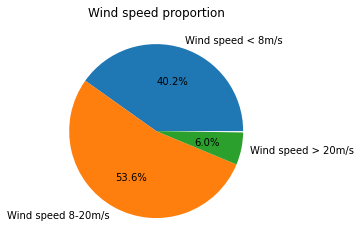

In [133]:
# pie chart here
plt.pie(tmp['%'], labels=tmp.index, autopct='%1.1f%%')
plt.title('Wind speed proportion')
plt.savefig('./img/Wind speed proportion.jpg')
plt.show()

## 7.3 Choosing blade length for potential power calculation

#### Potential power (kW) = 0.5 * air density 1.23 * (pi * blade length^2) * (wind speed^3) * Power coefficient 0.4 / 1000
We use power coefficient 0.4 because ......

We tried to find the blade length where the potential power generated is the closest to the actual power ...... power points bounced evenly around the 26 curve....

Vertical line wind speed 12m/s is plotted to show us .....

Length = 26m is the best fitted 

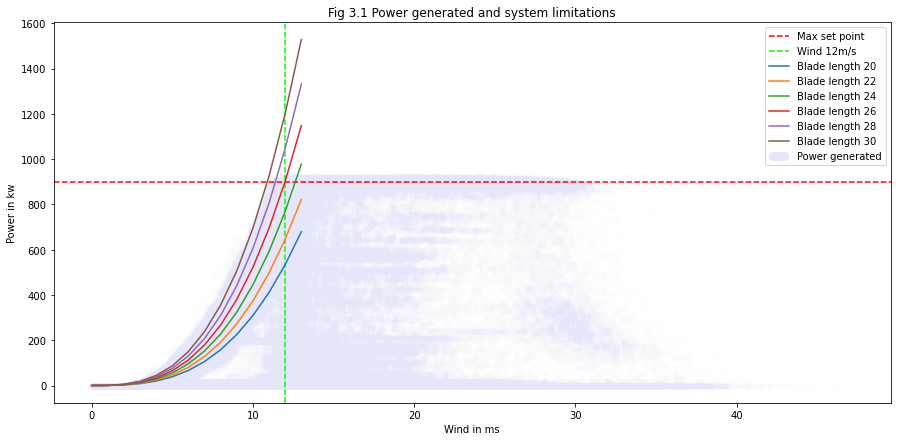

In [29]:
plt.figure(figsize=(15,7))

plt.scatter(df_supply['Wind_ms'],df_supply['Power_kw'], alpha=0.005, label='Power generated', color='lavender')
plt.axhline(y=900, color='r', linestyle='--', label='Max set point')
plt.axvline(12, color='lime', linestyle='--', label='Wind 12m/s')

# potential power curve
w = np.array(range(0,14)) # wind speed
length = range(20,31,2) # blade length in m
for l in length:
    potential_power=0.5*1.23*(np.pi*l**2)*(w**3)*0.4/1000
    plt.plot(potential_power, label='Blade length '+str(l))
    
plt.xlabel('Wind in ms')
plt.ylabel('Power in kw')
plt.title('Fig 3.1 Power generated and system limitations')
plt.legend(scatterpoints=1000)

plt.savefig('./img/Fig 3.1 Power generated and system limitations.jpg')
plt.show()

### 7.3.1 Curtailed power (kW)

#### 7.3.1.1 What is curtailed power?
How $strong$ the current is ......

#### 7.3.1.2 Curtailed power equation
curtailed power (kW) = potential power - total power consumed 

where,
- potential power: before 12m/s = theoratical potential power ; after 12m/s = 900kW (Max set point due to mechanical limitation. Theoratically can reach a higher power but practically constrainted by current mechanical design.)
- total power consumed = total power generated (Power_kw)

### 7.3.2 Curtailed energy (kWh)

#### 7.3.2.1 What is curtailed energy?
How $much$ energy actually curtailed....
We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### 7.3.2.2 Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power * 60 sec x 0.278 x 10^-3 

### 7.3.3 Curtailment computation
Data used:
- df_supply: Drop NA and 0 records except 0 Power_kW
- df_demand: Drop 2018 and household number outliers
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation.

Columns:
- Timestamp
- Power_kw:	average power in kW during the measurement period
- Setpoint_kw:	the mean maximum-allowed generator output during the measurement period
- Wind_ms:	mean wind speed at the turbine during the measurement period.
- Potential_power_kw:	potential energy of single turbine = 0.5 * 1.23 * (pi * 26^2) * wind speed ^3 * 0.4 / 1000
- Curtailed_power_kw: potential power - total power consumed. Replaced as 0 for all negative numbers.
- Curtailed_energy_in_1_minute_kwh:	Aggregated power in 1 minute. curtailed power * 60 sec x 0.278 x 10^-3 

In [31]:
df_curtail = df_supply.dropna()[df_supply.Setpoint_kw != 0][df_supply.Wind_ms != 0] # drop all NA and 0 Setpoint_kw, 0 Wind_ms
df_curtail['Potential_power_kw'] = 0.5*1.23*np.pi*26**2*(df_curtail['Wind_ms']**3)*0.4/1000
df_curtail['Potential_power_kw'][df_curtail['Wind_ms'] >= 12] = 900
df_curtail['Curtailed_power_kw'] = df_curtail['Potential_power_kw'] - df_curtail['Power_kw']
df_curtail['Curtailed_power_kw'][df_curtail['Curtailed_power_kw'] < 0] = 0 # set negative curtailment to 0
df_curtail['Curtailed_energy_in_1_minute_kwh'] = df_curtail['Curtailed_power_kw']*60 * 0.278 /100
df_curtail.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms  Potential_power_kw  \
0 2015-05-28 00:00:23      80.0        900.0      4.9           61.463872   
1 2015-05-28 00:01:23      78.0        900.0      5.4           82.264593   
2 2015-05-28 00:02:23      52.0        900.0      4.9           61.463872   

   Curtailed_power_kw  Curtailed_energy_in_1_minute_kwh  
0            0.000000                          0.000000  
1            4.264593                          0.711334  
2            9.463872                          1.578574

## 7.4 Curtailment visualisations
### 7.4.1 Curtailed power plots

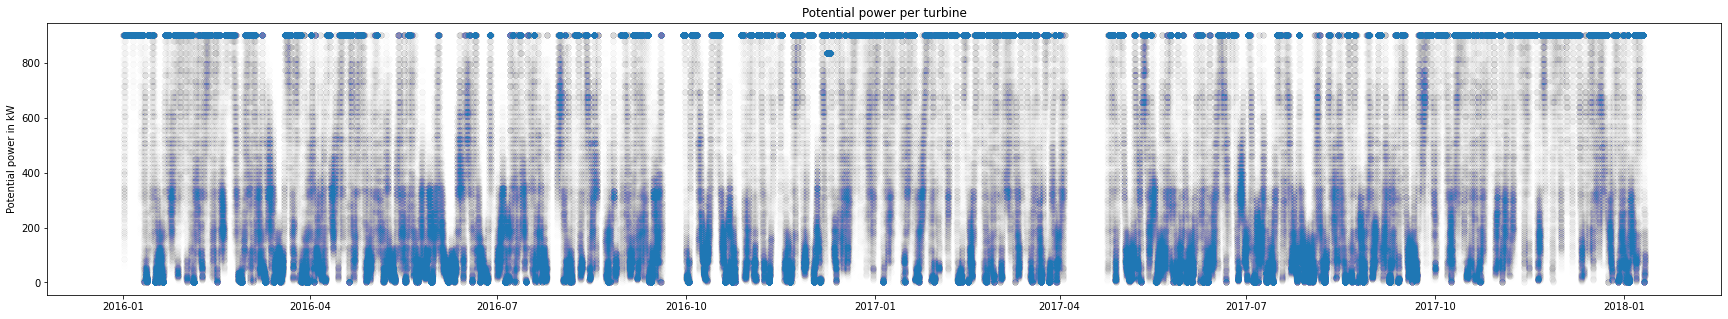

In [32]:
# Potential power
tmp = df_curtail[df_curtail['Timestamp'].dt.year != 2015]
plt.figure(figsize=(30,5))
plt.scatter(tmp['Timestamp'], tmp['Potential_power_kw'], alpha = 0.005)
plt.ylabel('Potential power in kW')
plt.title('Potential power per turbine')

plt.savefig('./Img/Potential power per turbine.jpg')
plt.show()

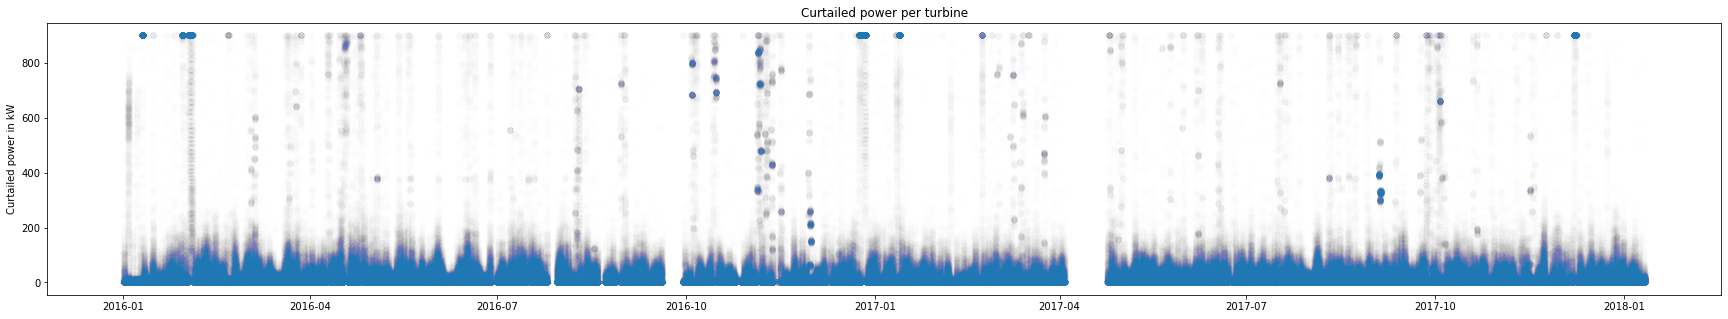

In [33]:
# Curtailed power
tmp = df_curtail[df_curtail['Timestamp'].dt.year != 2015]
plt.figure(figsize=(30,5))
plt.scatter(tmp['Timestamp'], tmp['Curtailed_power_kw'], alpha = 0.005)
plt.ylabel('Curtailed power in kW')
plt.title('Curtailed power per turbine')

plt.savefig('./Img/Curtailed power per turbine.jpg')
plt.show()

### 7.4.2 Curtailed energy plots

In [35]:
tmp = df_supply.dropna()[df_supply.Setpoint_kw != 0][df_supply.Wind_ms != 0][df_supply.Timestamp.dt.year == 2017] # drop all NA and 0 Setpoint_kw, 0 Wind_ms, include only 2017 for consistency
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

tmp = df_curtail[:]
tmp['Time_yyyymm'] = tmp.Timestamp.dt.strftime('%Y-%m')
tmp['Time_year'] = tmp.Timestamp.dt.year
tmp['Time_month'] = tmp.Timestamp.dt.month
tmp['Time_day'] = tmp.Timestamp.dt.day
tmp['Time_hour'] = tmp.Timestamp.dt.hour

# Hourly sum of curtailed energy
Sum_YearMonthHour_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month','Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').reset_index().rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
# Daily sum of curtailed energy
Sum_YearMonthDay_curtailed_energy_kWh = pd.pivot_table(tmp, index=[tmp.Timestamp.dt.date,'Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
# Monthly sum of curtailed energy
Sum_YearMonth_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})

# Average curtailed energy per hour
Avg_MonthHour_curtailed_energy_kWh = pd.pivot_table(Sum_YearMonthHour_curtailed_energy_kWh, index=['Time_month','Time_hour'], values='Curtailed_energy_kwh', aggfunc='mean').join(wind_avg)
# Average curtailed energy per months
tmp = Sum_YearMonth_curtailed_energy_kWh.reset_index()
Avg_Month_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_month'], values='Curtailed_energy_kwh', aggfunc='mean')


In [36]:
Sum_YearMonthHour_curtailed_energy_kWh.head(3)

Time_year  Time_month  Time_hour  Curtailed_energy_kwh
0       2015           5          0            280.963082
1       2015           5          1            280.373090
2       2015           5          2            321.438916

In [37]:
Sum_YearMonthDay_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Timestamp  Time_hour                      
2015-05-28 0                     45.940543
           1                     91.391649
           2                     19.810786

In [38]:
Sum_YearMonth_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Time_year Time_month                      
2015      5                   12995.408001
          6                   10491.859506
          9                   95967.958413

In [39]:
Avg_MonthHour_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh    Wind_ms
Time_month Time_hour                                 
1          0                  11100.690416  12.645243
           1                  11438.059471  13.002209
           2                  13651.766471  13.460066

In [40]:
Avg_Month_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Time_month                      
1                  244559.665587
2                  335910.691179
3                  289521.800631

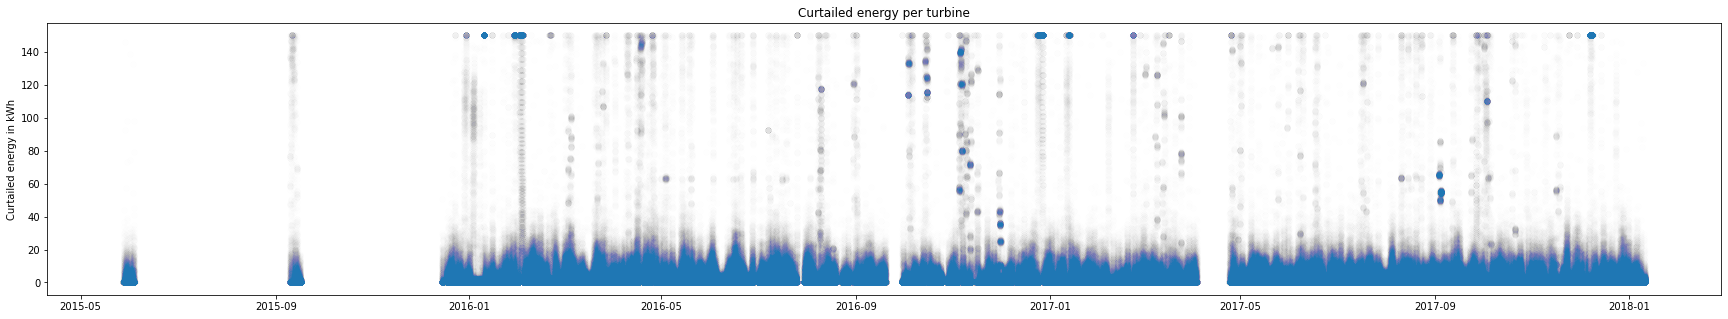

In [41]:
# Curtailed energy scatter plot
plt.figure(figsize=(30,5))
plt.scatter(df_curtail['Timestamp'], df_curtail['Curtailed_energy_in_1_minute_kwh'], alpha = 0.005)
plt.ylabel('Curtailed energy in kWh')
plt.title('Curtailed energy per turbine')

plt.savefig('./Img/Curtailed energy per turbine.jpg')
plt.show()

Sum of curtailed energy graph below illustrated that curtailed energy in 2017 is in general lower than 2016, this could possibly due to increasing households thus using more energy.

Opposite trends in Apr, Sep could due to much less data in Sep 2016 and Apr 2017.

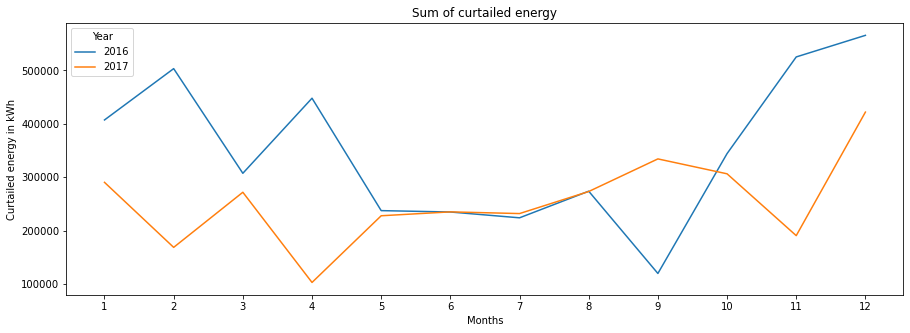

In [42]:
plt.figure(figsize=(15,5))
for i in [2016,2017]:
    plt.plot(Sum_YearMonth_curtailed_energy_kWh.loc[(i)], label=i)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Sum of curtailed energy')
plt.legend(title='Year')

plt.savefig('./Img/Sum of curtailed energy per turbine.jpg')
plt.show()

<AxesSubplot:xlabel='Timestamp,Timestamp'>

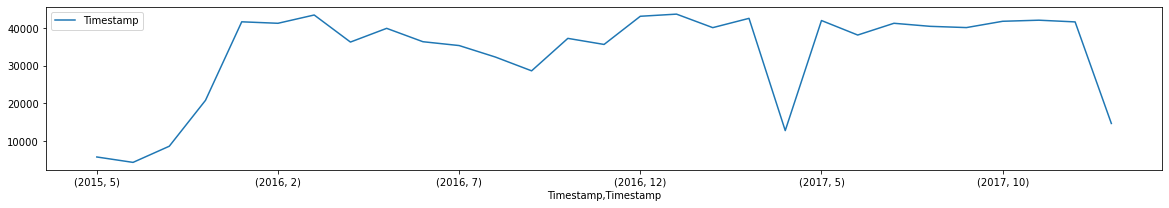

In [153]:
# counting missing data
df_curtail.groupby([df_curtail.Timestamp.dt.year,df_curtail.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3))

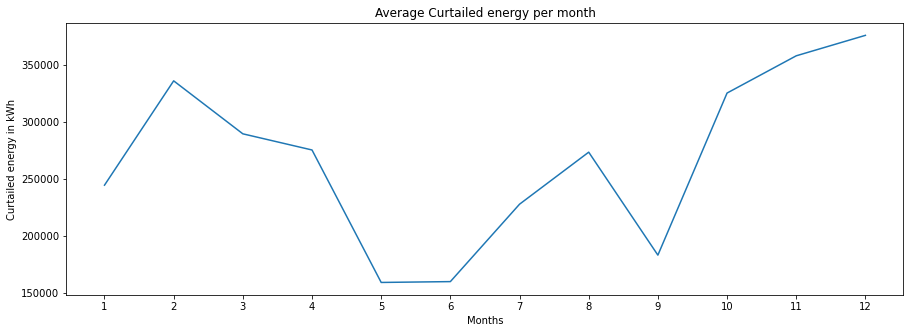

In [43]:
plt.figure(figsize=(15,5))
plt.plot(Avg_Month_curtailed_energy_kWh)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Average Curtailed energy per month')

plt.savefig('./Img/Average Curtailed energy per month per turbine.jpg')
plt.show()

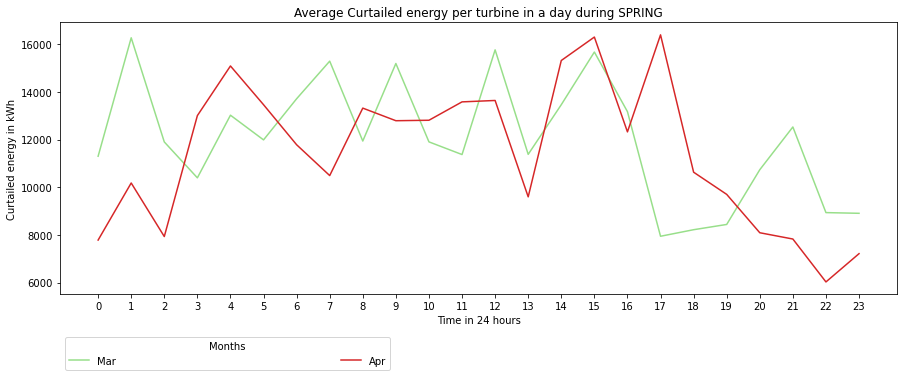

In [44]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(3,5):   
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])

plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during SPRING')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.4, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during SPRING per turbine.jpg')
plt.show()

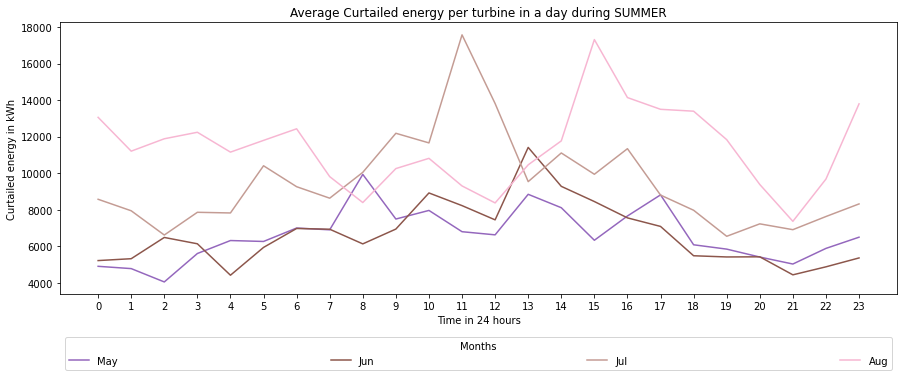

In [45]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(5,9):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during SUMMER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during SUMMER per turbine.jpg')
plt.show()

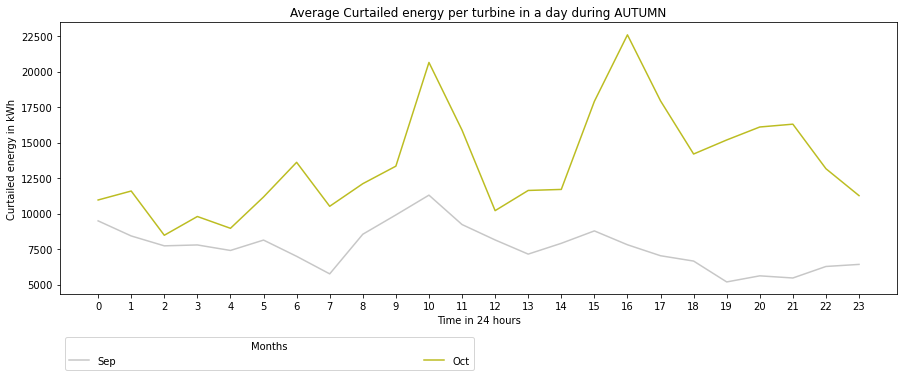

In [46]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(9,11):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during AUTUMN')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.5, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during AUTUMN per turbine.jpg')
plt.show()

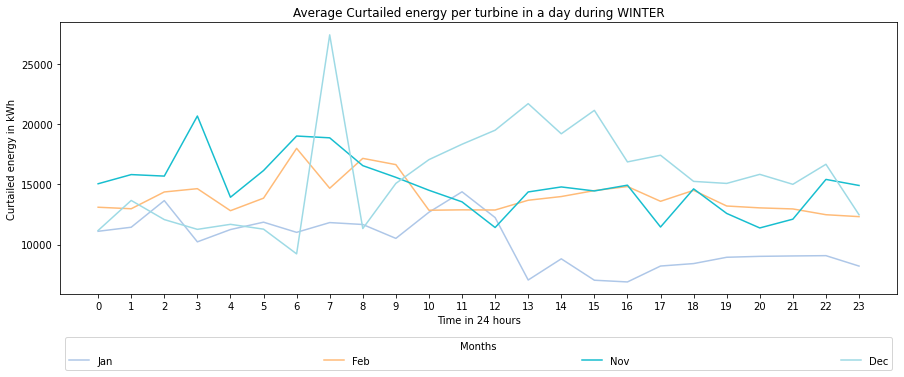

In [47]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in [1,2,11,12]:
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during WINTER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during WINTER per turbine.jpg')
plt.show()

## 7.5 User behaviors

### 7.5.1  Average Wind speed pattern (Fig 4.5):
1. Winter (Nov - Feb): highest
2. Summer (May - Aug): lowest
3. Spring and Autumn: moderate
4. Not much differences in terms of hours

### 7.5.2 Average Demand pattern (Fig 4.6):
1. 0am-5am: low, sleeping
2. 5am-7am: start rising coz time to wakeup
3. 7am-3pm: constant coz people in office/ school, maybe just one person at home watching TV or doing houseworks.
4. 3pm-5pm: rise, peak at 6pm. People off work/ school, back to home and start using electricity like TV, computer, lights....
5. Winter time colder and dark earlier thus higher demand during 5pm-11pm
6. 6pm-11pm dropping: Night life outside, time to sleep

### 7.5.3 Average Curatiled energy (Fig 4.7):
1. Don't have obvious pattern because wind 
2. Further investigate each months behaior using the interaction graph


<Figure size 1080x648 with 0 Axes>

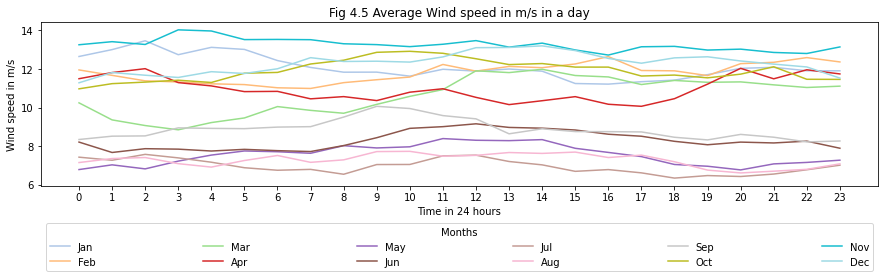

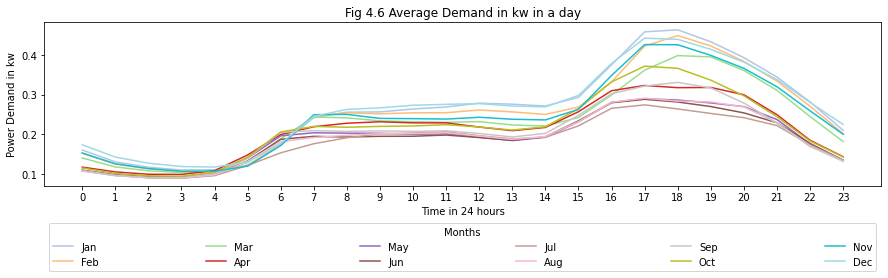

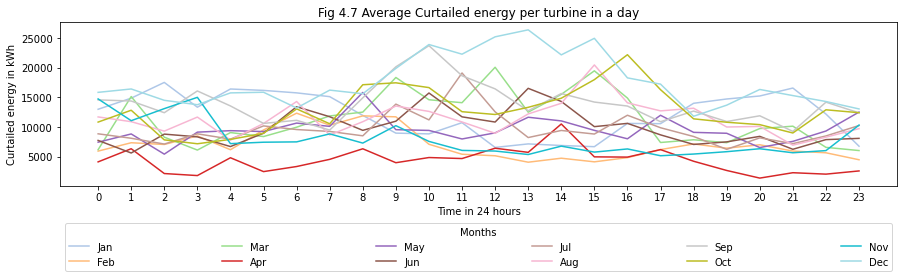

In [52]:
plt.figure(figsize=(15,9))

##### ---- Average Wind speed in m/s in a day (2017)
tmp = df_supply.dropna()[df_supply.Setpoint_kw != 0][df_supply.Wind_ms != 0][df_supply.Timestamp.dt.year == 2017] # drop all NA and 0 Setpoint_kw, 0 Wind_ms, include only 2017 for consistency
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

# plot
plt.figure(figsize=(15,3))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for Month in range(1,13): 
    plt.plot(wind_avg.loc[(Month),'Wind_ms'], label=month[Month-1], color=colors[Month])
plt.xticks(range(0,24,1))
plt.ylabel('Wind speed in m/s')
plt.xlabel('Time in 24 hours')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.5 Average Wind speed in m/s in a day')
plt.savefig('./Img/Fig 4.5 Average Wind speed in ms in a day.jpg')
plt.show()

##### ---- Average Demand in kw in a day (2017)
# Averge demands per households

tmp=df_demand[df_demand.Timestamp.dt.year == 2017] # 2018 only have one month data. Drop 2018 for easier calculation.

# Drop outliers
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 7][tmp['N_households'] < 8000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 9][tmp['N_households'] > 15000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 11][tmp['N_households'] > 10500].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 12][tmp['N_households'] > 11000].index)

tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

monthly_avg_demand = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)

# plot
plt.figure(figsize=(15,3))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for Month in range(1,13): 
    plt.plot(monthly_avg_demand.loc[(Month),'Demand_mean_kw'], label=month[Month-1], color=colors[Month])
plt.xticks(range(0,24,1))
plt.ylabel('Power Demand in kw')
plt.xlabel('Time in 24 hours')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.6 Average Demand in kw in a day')
plt.savefig('./Img/Fig 4.6 Average Demand in kw in a day.jpg')
plt.show()


##### ---- Average Curtailed energy per turbine in a day (2017)
tmp = Sum_YearMonthHour_curtailed_energy_kWh[Sum_YearMonthHour_curtailed_energy_kWh.Time_year == 2017].iloc[:,1:]
plt.figure(figsize=(15,3))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
for Month in range(1,13): 
    plt.plot(tmp[tmp.Time_month == Month]['Time_hour'],
             tmp[tmp.Time_month == Month]['Curtailed_energy_kwh'],
             label=months[Month-1], color=colors[Month])

plt.ylabel('Curtailed energy in kWh')  
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.7 Average Curtailed energy per turbine in a day')  
plt.savefig('./Img/Fig 4.7 Average Curtailed energy per turbine in a day.jpg')
plt.show()


### 7.5.4 Interaction graph

In [83]:
from ipywidgets import interact, interact_manual

@interact(Month=[1,2,3,4,5,6,7,8,9,10,11,12])
##### ---- Average Curtailed energy per turbine in a day (2017)
def graph(Month):
    
    plt.figure(figsize=(15,12))
    
    
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312)
    ax3 = plt.subplot(313)
    
    ##### ---- Average Wind speed in m/s in a day (2017)
    tmp = df_supply.dropna()[df_supply.Setpoint_kw != 0][df_supply.Wind_ms != 0][df_supply.Timestamp.dt.year == 2017] # drop all NA and 0 Setpoint_kw, 0 Wind_ms, include only 2017 for consistency
    tmp['Time_month'] = df_supply.Timestamp.dt.month
    tmp['Time_hour'] = df_supply.Timestamp.dt.hour
    wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

    # plot
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    ax1.plot(wind_avg.loc[(Month),'Wind_ms'], label=month[Month-1], color=colors[Month])
    ax1.set_xticks(range(0,24,1))
    ax1.set_ylabel('Wind speed in m/s')
    ax1.set_title('Average Wind speed in m/s in a day')
    
    ##### ---- Average Demand in kw in a day (2017)
    # Averge demands per households

    tmp=df_demand[df_demand.Timestamp.dt.year == 2017] # 2018 only have one month data. Drop 2018 for easier calculation.

    # Drop outliers
    tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 7][tmp['N_households'] < 8000].index)
    tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 9][tmp['N_households'] > 15000].index)
    tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 11][tmp['N_households'] > 10500].index)
    tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 12][tmp['N_households'] > 11000].index)

    tmp['Time_month'] = tmp['Timestamp'].dt.month
    tmp['Time_hour'] = tmp['Timestamp'].dt.hour

    monthly_avg_demand = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)

    # plot
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax2.plot(monthly_avg_demand.loc[(Month),'Demand_mean_kw'], label=month[Month-1], color=colors[Month])
    ax2.set_xticks(range(0,24,1))
    ax2.set_ylabel('Power Demand in kw')
    ax2.set_title('Average Demand in kw in a day')

    ##### ---- Average Curtailed energy per turbine in a day (2017)
    tmp = Sum_YearMonthHour_curtailed_energy_kWh[Sum_YearMonthHour_curtailed_energy_kWh.Time_year == 2017].iloc[:,1:]
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
    ax3.plot(tmp[tmp.Time_month == Month]['Time_hour'],
             tmp[tmp.Time_month == Month]['Curtailed_energy_kwh'],
             label=months[Month-1], color=colors[Month])

    ax3.set_ylabel('Curtailed energy in kWh')
    ax3.set_xticks(range(0,24,1))
    ax3.set_title('Average Curtailed energy per turbine in a day') 
    ax3.set_xlabel('Time in 24 hours')
    
    plt.tight_layout(pad=2.0)
    plt.show()

interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

### 7.5.5 Sum of demands per househoulds
Demand_mean_kw provided is the mean demand of the sample of households during the measurement period. i.e. a record with time at xx:00:00 in an hour, the Demand_mean_kw of that record is the mean between 00-30 minute in that hour. Assuming that every minutes within that period have the same demand in kW, we can calculate sum of demand in terms of energy (kWh) by multiplying Demand_mean_kw by:
1. Aggregated demand power in 1 minute = Demand_mean_kw * 60 sec x 0.278 x 10^-3
2. Thus, aggregated demand power in 30 minuts = (Demand_mean_kw * 60 sec x 0.278 x 10^-3) * 30

In [50]:
tmp=df_demand[df_demand.Timestamp.dt.year == 2017] # 2018 only have one month data. Drop 2018 for easier calculation.
tmp['Sum_demand_30min_kWh_1_household'] = (tmp['Demand_mean_kw']* 60 * 0.278 /1000) * 30
tmp['Total_demand_30min_kWh_N_households'] = tmp['Sum_demand_30min_kWh_1_household']* tmp['N_households']

# Drop outliers
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 7][tmp['N_households'] < 8000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 9][tmp['N_households'] > 15000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 11][tmp['N_households'] > 10500].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 12][tmp['N_households'] > 11000].index)

tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_day'] = tmp['Timestamp'].dt.day
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

DateHour_sum_demand_1house = pd.pivot_table(tmp, index=[tmp['Timestamp'].dt.date, 'Time_hour'], values='Sum_demand_30min_kWh_1_household', aggfunc='sum').rename(columns={'Sum_demand_30min_kWh_1_household': 'Demand_1house_kWh'})
MonthHour_sum_demand_1house = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Sum_demand_30min_kWh_1_household', aggfunc='sum').rename(columns={'Sum_demand_30min_kWh_1_household': 'Demand_1house_kWh'})

DateHour_sum_demand_Nhouses = pd.pivot_table(tmp, index=[tmp['Timestamp'].dt.date, 'Time_hour'], values='Total_demand_30min_kWh_N_households', aggfunc='sum').rename(columns={'Total_demand_30min_kWh_N_households': 'Demand_Nhouse_kWh'})
MonthHour_sum_demand_Nhouses = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Total_demand_30min_kWh_N_households', aggfunc='sum').rename(columns={'Total_demand_30min_kWh_N_households': 'Demand_Nhouse_kWh'})

DateHour_sum_demand = DateHour_sum_demand_1house.join(DateHour_sum_demand_Nhouses)
MonthHour_sum_demand = MonthHour_sum_demand_1house.join(MonthHour_sum_demand_Nhouses)

montly_avg_N_house = pd.pivot_table(tmp, index=['Time_month'], values='N_households', aggfunc='mean')

monthly_sum_demand = MonthHour_sum_demand_1house.reset_index().groupby('Time_month').sum().iloc[:,1:]
monthly_sum_demand = monthly_sum_demand.join(montly_avg_N_house)
monthly_sum_demand['Demand_Nhouse_kWh'] = monthly_sum_demand['Demand_1house_kWh'] * monthly_sum_demand['N_households']
monthly_sum_demand

Demand_1house_kWh  N_households  Demand_Nhouse_kWh
Time_month                                                    
1                  195.266512   5673.939516       1.107930e+06
2                  168.742067   6137.201637       1.035604e+06
3                  172.295374   6550.828629       1.128677e+06
4                  152.221313   6945.368750       1.057233e+06
5                  142.937107   7424.366263       1.061217e+06
6                  135.411798   7967.334722       1.078871e+06
7                  135.587264   8279.539704       1.122600e+06
8                  141.151770   8622.962366       1.217146e+06
9                   77.024511   9251.007812       7.125544e+05
10                 160.005001   9646.357527       1.543465e+06
11                 169.659631  10202.172414       1.730897e+06
12                 126.700389  10606.905208       1.343899e+06

### 7.5.6 Predict Monthly power generation by Linear regression

In [77]:
avg_curtail = df_curtail[:]
avg_curtail['month'] = avg_curtail['Timestamp'].dt.month
avg_curtail['hour'] = avg_curtail['Timestamp'].dt.hour

tmp1 = avg_curtail[avg_curtail['Timestamp'].dt.year==2017].groupby([avg_curtail.Timestamp.dt.date, 'hour']).mean().reset_index()
tmp2 = avg_curtail[avg_curtail['Timestamp'].dt.year==2017].groupby([avg_curtail.Timestamp.dt.date, 'hour']).sum().reset_index()
tmp1['Curtailed_energy_1hr_kwh'] = tmp2['Curtailed_energy_in_1_minute_kwh']
tmp1=tmp1.merge(DateHour_sum_demand_1house.reset_index(), how='left', left_on=["Timestamp","hour"], right_on=["Timestamp", "Time_hour"]).dropna()
tmp1['Wind_sq'] = tmp1['Wind_ms'] **2

tmp1['Low_usage'] = 0
tmp1['Medium_usage'] = 0
tmp1['High_usage'] = 0
tmp1['Spring'] = 0
tmp1['Summer'] = 0
tmp1['Autumn'] = 0
tmp1['Winter'] = 0


tmp1['Low_usage'][tmp1['hour'].isin([23,0,1,2,3,4,5])] = 1 #Low usage
tmp1['Medium_usage'][tmp1['hour'].isin(list(range(6,17)))] = 1 #Medium usage
tmp1['High_usage'][tmp1['hour'].isin(list(range(17,23)))] = 1
tmp1['Spring'][tmp1['month'].isin([3,4])] = 1
tmp1['Summer'][tmp1['month'].isin([5,6,7,8])] = 1
tmp1['Autumn'][tmp1['month'].isin([9,10])] = 1
tmp1['Winter'][tmp1['month'].isin([11,12,1,2])] = 1

x = tmp1[['Demand_1house_kWh','Wind_ms','Potential_power_kw']]
y = tmp1['Power_kw']


Text(0.5, 1.0, 'Correlation Heatmap')

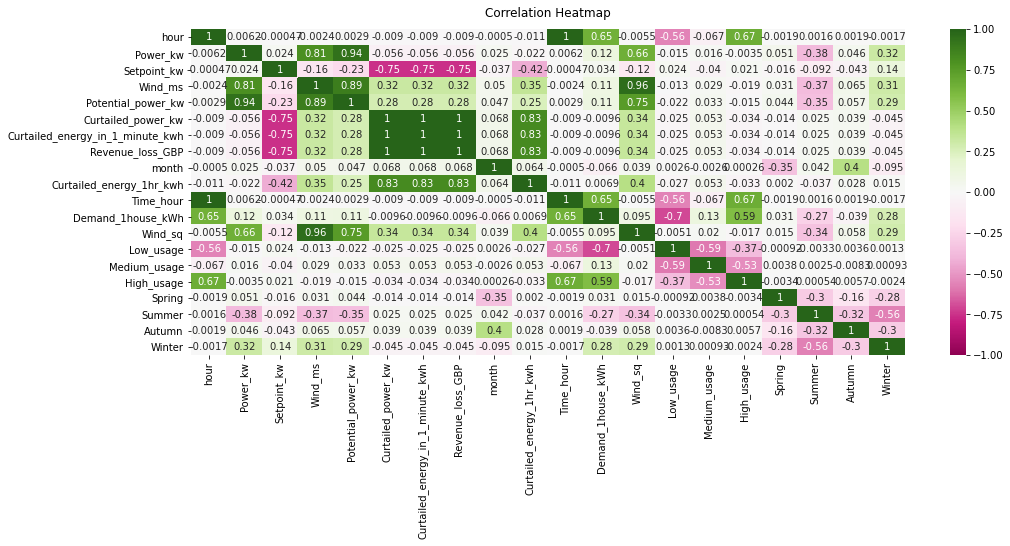

In [78]:
tmp = tmp1[['Wind_ms','Power_kw','Potential_power_kw','Demand_1house_kWh','Curtailed_energy_1hr_kwh']]

plt.figure(figsize=(16,6))

heatmap = sns.heatmap(tmp1.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG")

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<AxesSubplot:xlabel='Power_kw'>

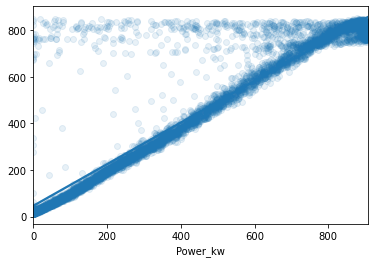

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
tmp1['Predict_power_kw'] = predictions
sns.regplot(y,predictions,scatter_kws={'alpha':0.1})

In [80]:
import statsmodels.api as sm

X = sm.add_constant(x)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Power_kw   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 2.064e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:45:47   Log-Likelihood:                -45173.
No. Observations:                7412   AIC:                         9.035e+04
Df Residuals:                    7408   BIC:                         9.038e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.2686      3

With the predicted power in kw, we can again calculate curtailment using equations as discussed earlier. 

We can substitue the demand with new desired values to see how far we can go 

## 7.6 Problems of curtailment

### 7.6.1 Huge loss in revenue

Electricity cost in Orkney https://www.switch-plan.co.uk/suppliers/scottish-power/orkney/:

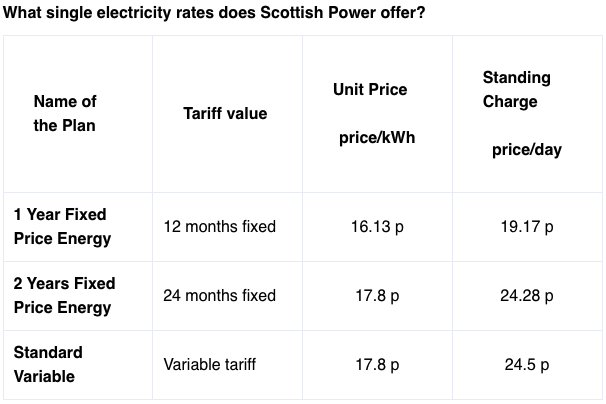

Assume the Orkney wind turbine provider charges customers the lowest rate of Scottish Power: 16.13p /kWh and 19.17p /day, revenue loss per minute due to curtailment equals to (Curtailed energy in kWh/minute * 16.13 + 19.17/1440) * 0.01

In [165]:
# number of minute in a day = 24*60 = 1440
# 19.17p/day standing charge converted to minute = (19.17 / 1440)p/minute
24*60

1440

In [156]:
df_curtail['Revenue_loss_GBP'] = (df_curtail.Curtailed_energy_in_1_minute_kwh* 16.13 + 19.17/1440)*0.01
df_curtail.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms  Potential_power_kw  \
0 2015-05-28 00:00:23      80.0        900.0      4.9           61.463872   
1 2015-05-28 00:01:23      78.0        900.0      5.4           82.264593   
2 2015-05-28 00:02:23      52.0        900.0      4.9           61.463872   

   Curtailed_power_kw  Curtailed_energy_in_1_minute_kwh  Revenue_loss_GBP  
0            0.000000                          0.000000          0.000133  
1            4.264593                          0.711334          0.114871  
2            9.463872                          1.578574          0.254757

In [169]:
# yearly revenu loss in GBP
tmp = df_curtail[df_curtail.Timestamp.dt.year.isin([2016,2017])].groupby(df_curtail['Timestamp'].dt.year).sum()[['Curtailed_energy_in_1_minute_kwh','Revenue_loss_GBP']].rename(columns={'Curtailed_energy_in_1_minute_kwh':'Annual Curtailment in kWh per turbine', 'Revenue_loss_GBP': 'Revenue loss in GBP per turbine'})
tmp['Revenue loss in GBP for 500 turbines'] = tmp['Revenue loss in GBP per turbine'] * 500
tmp

Annual Curtailment in kWh per turbine  \
Timestamp                                          
2016                                4.189915e+06   
2017                                3.054279e+06   

           Revenue loss in GBP per turbine  \
Timestamp                                    
2016                         675893.425140   
2017                         492717.342427   

           Revenue loss in GBP for 500 turbines  
Timestamp                                        
2016                               3.379467e+08  
2017                               2.463587e+08

### 7.6.2 So many extra households can be supported
There're huge curtailment and kind of unlimited which could be used to help the poverty by giving high discounts.

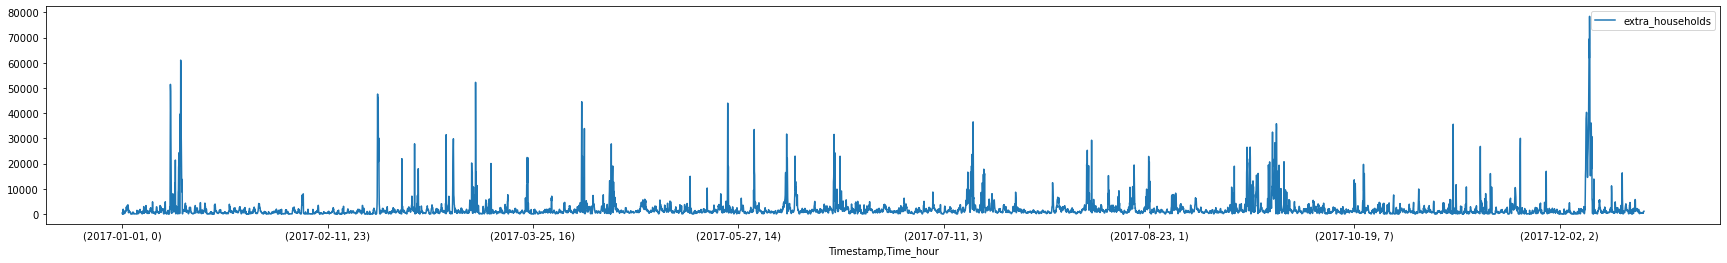

In [53]:
# extra households per one turbine curtailment
extra_households=Sum_YearMonthDay_curtailed_energy_kWh.join(DateHour_sum_demand_1house).dropna()
extra_households['extra_households'] = extra_households['Curtailed_energy_kwh']/extra_households['Demand_1house_kWh']
g = extra_households.iloc[:,-1:].plot(figsize=(30,4))

In [54]:
extra_households.describe()

Curtailed_energy_kwh  Demand_1house_kWh  extra_households
count           7412.000000        7412.000000       7412.000000
mean             381.183322           0.219156       2044.979394
std              816.421821           0.090075       4465.190242
min                0.000000           0.087827          0.000000
25%              113.563811           0.143491        504.814374
50%              200.997290           0.212045       1017.325052
75%              342.262150           0.273037       1847.987491
max             9007.200000           0.507432      78440.619405

In [159]:
# Extra households per 500 turbines curtailment
tmp = Sum_YearMonthDay_curtailed_energy_kWh[:]
tmp['Curtailed_energy_kwh_500turbines'] = tmp['Curtailed_energy_kwh'] * 500
tmp=tmp.join(DateHour_sum_demand_1house).dropna().reset_index()
tmp = tmp.groupby('Timestamp').sum().iloc[:,1:]
tmp['Affordable_extra_households'] = tmp['Curtailed_energy_kwh_500turbines']/tmp['Demand_1house_kWh']
tmp = tmp.reset_index()
tmp.Timestamp = pd.to_datetime(tmp.Timestamp)
tmp=tmp.groupby([tmp.Timestamp.dt.month]).sum()
tmp.describe()

Curtailed_energy_kwh  Curtailed_energy_kwh_500turbines  \
count             12.000000                      1.200000e+01   
mean          235444.231724                      1.177221e+08   
std            71844.494928                      3.592225e+07   
min           102891.957458                      5.144598e+07   
25%           181501.575865                      9.075079e+07   
50%           233382.745690                      1.166914e+08   
75%           277451.877481                      1.387259e+08   
max           364876.754623                      1.824384e+08   

       Demand_1house_kWh  Affordable_extra_households  
count          12.000000                 1.200000e+01  
mean          135.365179                 2.401747e+07  
std            41.724847                 7.290062e+06  
min            47.948826                 1.051898e+07  
25%           122.586908                 1.896184e+07  
50%           137.679209                 2.516225e+07  
75%           166.973310                 3.013428e+07  
max           193.371144                 3.181816e+07

In [160]:
# Maximum extra demand affordable by curtailed energy of 500 turbines: 869663 households
(tmp.Curtailed_energy_kwh_500turbines-tmp.Demand_1house_kWh*869663).sum()

333.801874384284

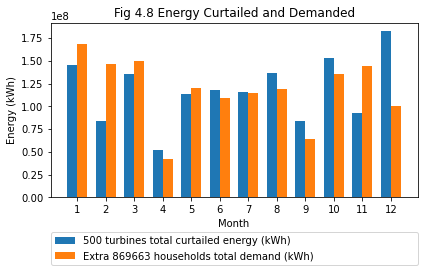

In [63]:
#--------- plot of monthly curtailed energy and extra usage

tmp['Demand_extrahouse_kWh'] = tmp['Demand_1house_kWh']*869663

l = np.arange(1,13)
width = 0.35

fig, ax = plt.subplots()

bar1=ax.bar(l-width/2, tmp.Curtailed_energy_kwh_500turbines, width, label = '500 turbines total curtailed energy (kWh)')
bar2=ax.bar(l+width/2, tmp.Demand_extrahouse_kWh, width, label='Extra 869663 households total demand (kWh)')
ax.set_xticks(l)
ax.set_xlabel('Month')
ax.set_ylabel('Energy (kWh)')
ax.set_title('Fig 4.8 Energy Curtailed and Demanded')
ax.legend(bbox_to_anchor=(0., -0.3, 1., .102), loc='upper center', mode="expand", borderaxespad=0.)
fig.tight_layout()

plt.savefig('./img/Fig 4.8 Extra households support.jpg')
plt.show()

# 7.7 Possible solutions for minimising curtailment

### 7.7.1 Meeting average electricity consumption

Total curtailed energy can support far more households than the Island can have in near future. The total number of households will always be a contraints, we should instead consider increasing demands. 

According to https://great-home.co.uk/average-electricity-gas-bills-in-2019/, average Energy Monthly Consumption in Scotland was 308kWh as shown in this table:
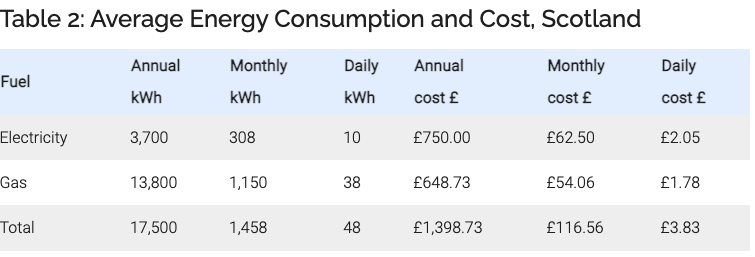

which is 2-3 times more than our 2017 Orkney wind turbine demands:
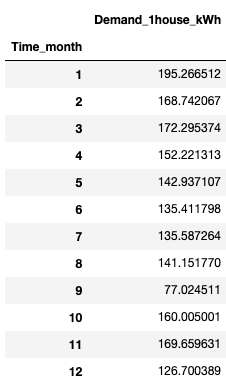

The reasons why households use not much wind energy, could possibly due to more gas usage instead of electricity, or inconvenience in turning wind turbine on and off. Therefore, we could at least increase average household demand 3 times by implementing discounts to attract them use more wind rather than gas, and more convenient wind turbine controls and smart meters.

We want not just the average demand meeting the average Scotland level, but more of that by yearly plans.

# Can night saved energy support whole day usage?
0am-6am: save all curtailed energy
rest of the day: use saved energy

Assume
1. All 22190 households use wind turbine
2. 500 wind turbines in total
3. 40MW daily export to GB
4. Seasonal average wind speed, power demand and usage pattern are the same, so we'll use 2017 data for 22190 households + 500 wind turbines estimation

In [68]:
daily_all_demand = 22190 * DateHour_sum_demand.rename(columns={'Sum_demand_kWh': 'Demand_22190households_kWh'})
daily_all_demand.head(3)

Demand_1house_kWh  Demand_Nhouse_kWh
Timestamp  Time_hour                                      
2017-01-01 0                4730.824075       2.568120e+07
           1                4021.912244       2.183496e+07
           2                3405.633831       1.848919e+07

In [69]:

tmp = df_curtail[df_curtail.Timestamp.dt.year ==2017][['Timestamp','Curtailed_energy_in_1_minute_kwh','Revenue_loss_GBP']]
tmp['date'] = tmp.Timestamp.dt.date
tmp['hour'] = tmp.Timestamp.dt.hour

tmp = 500*tmp.groupby(['date', 'hour']).sum().rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
tmp

Curtailed_energy_kwh  Revenue_loss_GBP
date       hour                                        
2017-01-01 0             41199.600000       6649.489230
           1              6004.800000        972.567990
           2               166.800000         30.033277
           3             11457.180044       1852.902204
           4              1501.200000        246.137310
...                               ...               ...
2017-12-31 19           278745.445477      44965.634105
           20           189347.566785      30545.756272
           21           271000.767076      43716.417479
           22           150263.447365      24241.487810
           23            73948.635909      11931.908722

[8030 rows x 2 columns]

In [70]:
Sum_YearMonthDay_curtailed_energy_kWh

Curtailed_energy_kwh
Timestamp  Time_hour                      
2015-05-28 0                     45.940543
           1                     91.391649
           2                     19.810786
           3                     58.312940
           4                    115.666458
...                                    ...
2018-01-11 2                     97.283389
           3                    123.806915
           4                    169.048555
           5                    129.146691
           6                      8.248065

[16853 rows x 1 columns]

In [73]:
# 2017 total power generated - total household demands 
tmp = df_supply[:]
tmp['Power_kwh'] = tmp['Power_kw'] * 60 * 0.278 /100 
tmp = tmp.groupby([tmp.Timestamp.dt.date, tmp.Timestamp.dt.hour]).sum().iloc[:,-1:]
tmp.index.names= ['Timestamp', 'Time_hour']
tmp = tmp.join(Sum_YearMonthDay_curtailed_energy_kWh)
tmp['Curtailed_energy_500turbines_kwh'] = tmp['Curtailed_energy_kwh'] *500
tmp = tmp.join(DateHour_sum_demand).dropna().reset_index().groupby('Timestamp').sum()

# demand increase 100%
tmp['Demand_1house_kWh_double'] = tmp['Demand_1house_kWh']*20

# 22190 house use wind turbine with double demand
tmp['Demand_22190house_kWh_double'] = tmp['Demand_1house_kWh_double']*22190

tmp

Time_hour    Power_kwh  Curtailed_energy_kwh  \
Timestamp                                                  
2017-01-01        276  186990.3060           6223.127061   
2017-01-02        276  189797.0496           5399.730713   
2017-01-03        276  216292.0620            797.637600   
2017-01-04        276  156236.5560           5280.220980   
2017-01-05        192   47038.7676           3483.925212   
...               ...          ...                   ...   
2017-12-23        276  179062.3020          13576.704754   
2017-12-26        276  102441.3876           8445.292857   
2017-12-27        276  194700.9696           6977.694778   
2017-12-28        276  143939.3928          10808.628533   
2017-12-29        276   18433.4016           3648.178887   

            Curtailed_energy_500turbines_kwh  Demand_1house_kWh  \
Timestamp                                                         
2017-01-01                      3.111564e+06           6.445196   
2017-01-02                      2.699865e+06           6.585212   
2017-01-03                      3.988188e+05           6.559163   
2017-01-04                      2.640110e+06           6.357504   
2017-01-05                      1.741963e+06           4.547323   
...                                      ...                ...   
2017-12-23                      6.788352e+06           6.301917   
2017-12-26                      4.222646e+06           6.327937   
2017-12-27                      3.488847e+06           6.526291   
2017-12-28                      5.404314e+06           6.523942   
2017-12-29                      1.824089e+06           6.727402   

            Demand_Nhouse_kWh  Demand_1house_kWh_double  \
Timestamp                                                 
2017-01-01       34993.633028                128.903922   
2017-01-02       35762.854914                131.704239   
2017-01-03       35599.287665                131.183262   
2017-01-04       34646.358431                127.150081   
2017-01-05       24925.567014                 90.946461   
...                       ...                       ...   
2017-12-23       67720.606178                126.038332   
2017-12-26       67926.455726                126.558733   
2017-12-27       70054.564853                130.525813   
2017-12-28       70022.531246                130.478838   
2017-12-29       72187.791070                134.548038   

            Demand_22190house_kWh_double  
Timestamp                                 
2017-01-01                  2.860378e+06  
2017-01-02                  2.922517e+06  
2017-01-03                  2.910957e+06  
2017-01-04                  2.821460e+06  
2017-01-05                  2.018102e+06  
...                                  ...  
2017-12-23                  2.796791e+06  
2017-12-26                  2.808338e+06  
2017-12-27                  2.896368e+06  
2017-12-28                  2.895325e+06  
2017-12-29                  2.985621e+06  

[319 rows x 8 columns]

In [74]:
df_curtail[df_curtail.Timestamp.dt.year == 2017].mean()

Power_kw                            433.902307
Setpoint_kw                         889.504187
Wind_ms                              10.139938
Potential_power_kw                  467.008427
Curtailed_power_kw                   39.188165
Curtailed_energy_in_1_minute_kwh      6.536586
Revenue_loss_GBP                      1.054484
dtype: float64

# How much can this be reduced by different levels of DR penetration?

As mentioned in 4.1.1.1, the average demand in Scotland is 2-3 times higher than Orkney local wind energy. With current number of households

In [ ]:
monthly_sum_demand.mean()

In [ ]:
df_curtail

# How many local households would need to be on our DR scheme in order to supply this level of DR?